In [2]:
import pandas as pd
dfT = pd.read_csv('https://raw.githubusercontent.com/ajaykuma/Datasets/master/a10.csv', parse_dates=['date'])

In [3]:
dfT.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [4]:
dfP = pd.read_csv('https://raw.githubusercontent.com/ajaykuma/Datasets/master/MarketArrivals.csv')

In [5]:
dfP.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [9]:
import matplotlib.pyplot as plt
def plot_dfT(dfT, x, y, title="", xlabel='Date', ylabel='Value'):
   #plt.figure(figsize=(16,5), dpi=dpi)
   plt.plot(x, y, color='tab:red')
   plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
   plt.show()

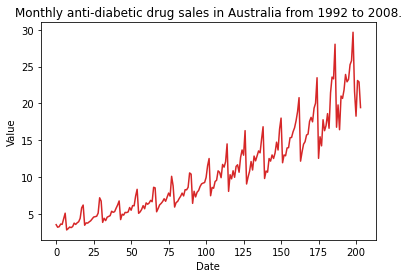

In [10]:

plot_dfT(dfT, x=dfT.index, y=dfT.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')   

In [11]:
import numpy as np

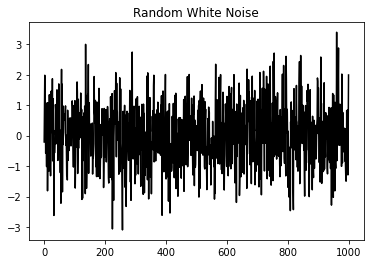

In [12]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')
plt.show()

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
from scipy import signal

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/ajaykuma/Datasets/master/a10.csv', parse_dates=['date'])

In [16]:
df.index

RangeIndex(start=0, stop=204, step=1)

In [17]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [18]:
detrended = signal.detrend(df.value.values)

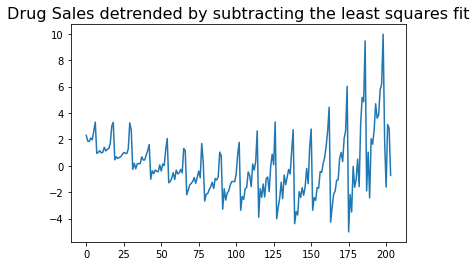

In [19]:
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)
plt.show()

In [20]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/ajaykuma/Datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [23]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [24]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

In [25]:
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

In [26]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()


,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


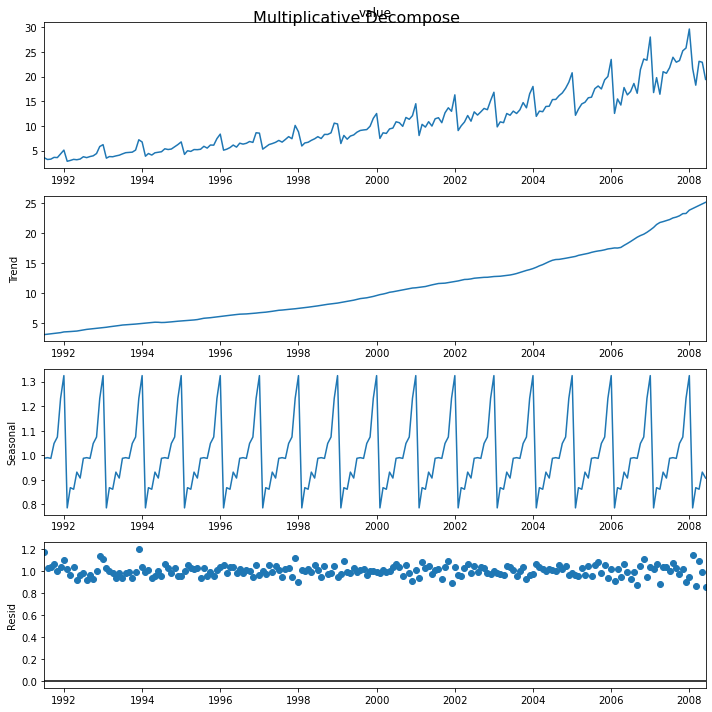

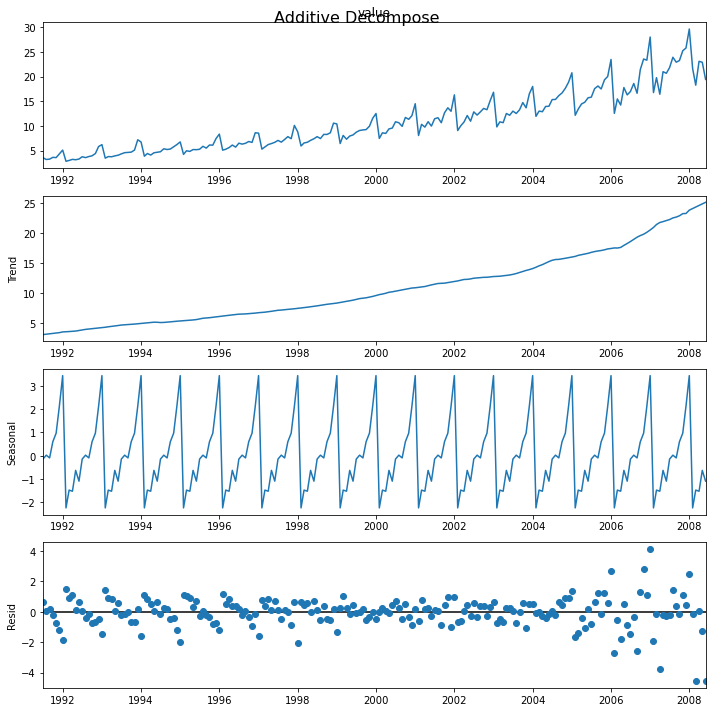

In [27]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16)
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

In [28]:
detrended = df.value.values - result_mul.trend

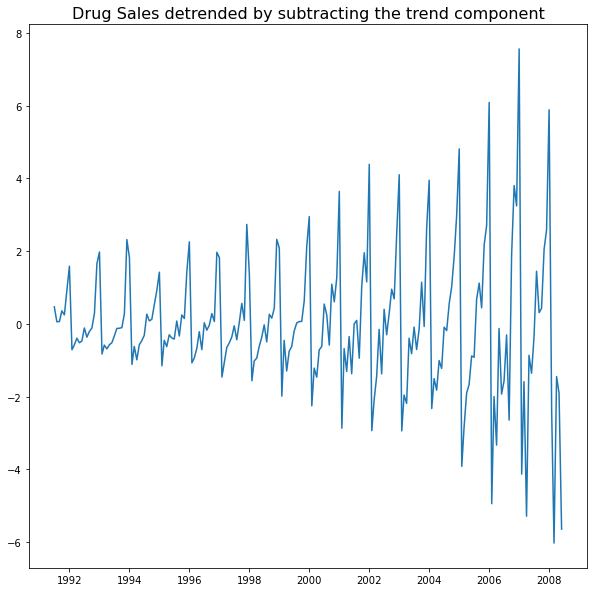

In [29]:
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

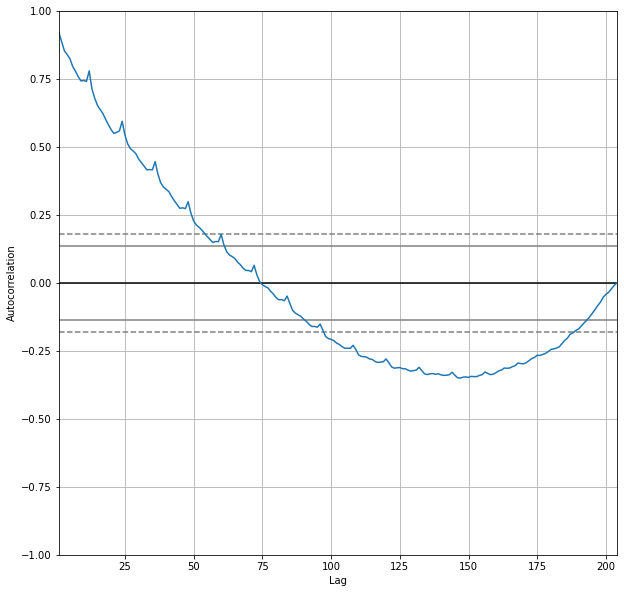

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.value.tolist())